In [1]:
!python --version

Python 3.10.16


In [5]:
%cd /home/jovyan/shares/SR008.fs2/iana_kulichenko/Experiments/render_final_scene

/home/jovyan/shares/SR008.fs2/iana_kulichenko/Experiments/render_final_scene


In [6]:
import os
os.environ["PATH"] = "/home/jovyan/.mlspace/envs/flux-tune-iana/bin:" + os.environ["PATH"]
os.environ["CUDA_HOME"] = "/home/jovyan/shares/SR008.fs2/iana_kulichenko/cuda-12.4"
os.environ["PATH"] = os.path.join(os.environ["CUDA_HOME"], "bin") + ":" + os.environ["PATH"]
print("CUDA_HOME =", os.environ["CUDA_HOME"])
print("PATH =", os.environ["PATH"])
!nvcc --version

CUDA_HOME = /home/jovyan/shares/SR008.fs2/iana_kulichenko/cuda-12.4
PATH = /home/jovyan/shares/SR008.fs2/iana_kulichenko/cuda-12.4/bin:/home/jovyan/.mlspace/envs/flux-tune-iana/bin:/home/jovyan/shares/SR008.fs2/iana_kulichenko/cuda-12.4/bin:/home/jovyan/.mlspace/envs/flux-tune-iana/bin:/home/jovyan/.mlspace/envs/flux-tune-iana/bin:/home/user/conda/condabin:/home/user/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/user/conda/bin
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Tue_Feb_27_16:19:38_PST_2024
Cuda compilation tools, release 12.4, V12.4.99
Build cuda_12.4.r12.4/compiler.33961263_0


In [7]:
!pip show networkx

Name: networkx
Version: 3.3
Summary: Python package for creating and manipulating graphs and networks
Home-page: https://networkx.org/
Author: 
Author-email: Aric Hagberg <hagberg@lanl.gov>
License: 
Location: /home/jovyan/.mlspace/envs/flux-tune-iana/lib/python3.10/site-packages
Requires: 
Required-by: dgl, scikit-image, torch


In [8]:
import os
import glob
import json
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import math
import matplotlib.transforms as transforms

In [9]:
class_colors = {
    "TV stand":        "#FF0000",  # Red
    "bar counter":     "#0000FF",  # Blue
    "bench":           "#FFFF00",  # Yellow
    "bookshelf":       "#FFBFBF",  # Light Pink
    "cabinet":         "#00FF00",  # Green
    "chair":           "#FFA500",  # Orange
    "chair-bed":       "#40E0D0",  # Turquoise
    "coffee table":    "#272643",  # Dark Slate Blue
    "desk":            "#FFD9BF",  # Light Peach
    "dining table":    "#8B00FF",  # Violet
    "fireplace":       "#FF9400",  # Orange-ish
    "floor lamp":      "#5500FF",  # Purple
    "floor plant":     "#29922C",  # Green
    "floor vase":      "#FF6347",  # Tomato
    "kitchen island":  "#ADFF2F",  # Green Yellow
    "modular kitchen": "#FF7F50",  # Coral
    "ottoman":         "#AFCC43",  # Lime Green
    "rocking chair":   "#FF8C00",  # Dark Orange
    "rug":             "#BAE8E8",  # Light Blue
    "shelves":         "#C71585",  # Medium Violet Red
    "side table":      "#00BFFF",  # Deep Sky Blue
    "sideboard":       "#DA70D6",  # Orchid
    "sofa":            "#FF00FF",  # Magenta
    "stool":           "#DC143C",  # Crimson
    "wardrobe":        "#552743",  # Violet dark
    "armchair":        "#4A2714",  # Dark Brown,
    "window":          "#000000",  # Black
}

In [10]:
def draw_2d_scene(scene_data):
    """Draws a 2D top-down view of the room with furniture, including rotation."""
    room_dims = scene_data[0].get("room_dimensions", [10, 8, 2.5])
    room_width, room_depth, _ = room_dims

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect("equal", adjustable="box")

    margin = max(0.2 * max(room_width, room_depth), 0.1)
    ax.set_xlim(-margin, room_width + margin)
    ax.set_ylim(-margin, room_depth + margin)
    ax.axis('off')

    # Draw the room outline
    room_rect = patches.Rectangle(
        (0, 0), room_width, room_depth,
        linewidth=2, edgecolor='black', facecolor='none'
    )
    ax.add_patch(room_rect)

    # Draw each object
    for obj_data in scene_data[1:]:
        obj_id = obj_data["new_object_id"]
        size_m = obj_data["size_in_meters"]
        pos_m = obj_data["position"]
        angle_deg = obj_data.get("rotation_z", 0)

        length = size_m["length"]
        width = size_m["width"]

        center_x = pos_m["x"]
        center_y = pos_m["y"]

        label = obj_id.rsplit("_", 1)[0].lower()
        base_color = class_colors.get(label, "#000000")
        edge_rgba = mcolors.to_rgba(base_color, 1.0)
        fill_rgba = mcolors.to_rgba(base_color, 0.3)

        rect = patches.Rectangle(
            xy=(-length/2, -width/2),
            width=length,
            height=width,
            linewidth=2,
            edgecolor=edge_rgba,
            facecolor=fill_rgba
        )

        # Rotate around (0,0) then translate to the object's center
        angle_rad = math.radians(angle_deg)
        t = (transforms.Affine2D()
             .rotate_around(0, 0, angle_rad)
             .translate(center_x, center_y))
        rect.set_transform(t + ax.transData)
        ax.add_patch(rect)

        # Add text label
        ax.text(
            center_x,
            center_y,
            label,
            ha="center",
            va="center",
            fontsize=9,
            color="black",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
        )

    plt.show()

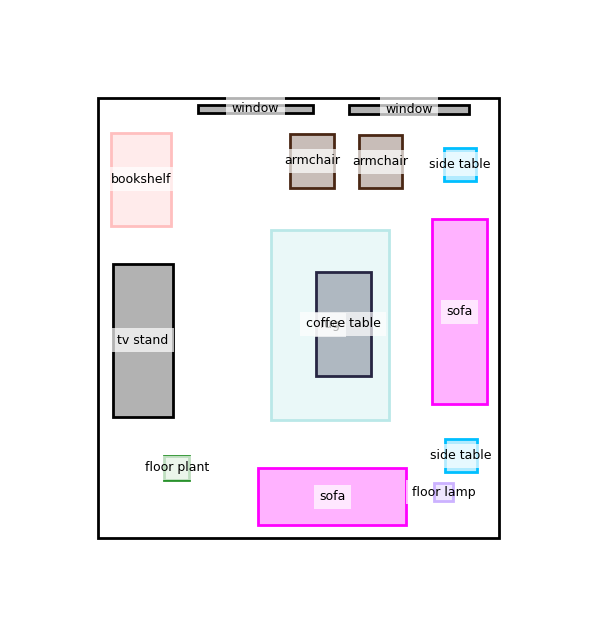

In [11]:
scene_file = "/home/jovyan/shares/SR008.fs2/iana_kulichenko/Experiments/furniture_detection_yolo/dataset_furn_100/13_jpg.rf.c31d51e36d3972bde3189d04c529d2d1_3d.json"
with open(scene_file, "r") as f:
        data = json.load(f)
draw_2d_scene(data)

In [13]:
!pwd

/home/jovyan/shares/SR008.fs2/iana_kulichenko/Experiments/render


In [33]:
!git clone https://huggingface.co/OpenShape/openshape-demo-support

Cloning into 'openshape-demo-support'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 102 (delta 9), reused 0 (delta 0), pack-reused 83 (from 1)
Receiving objects: 100% (102/102), 28.53 KiB | 712.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.


In [9]:
!pip uninstall pickleshare -y
!pip install pickleshare

Found existing installation: pickleshare 0.7.5
Uninstalling pickleshare-0.7.5:
  Successfully uninstalled pickleshare-0.7.5
  Using cached pickleshare-0.7.5-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached pickleshare-0.7.5-py2.py3-none-any.whl (6.9 kB)


In [14]:
%cd openshape-demo-support

/home/jovyan/shares/SR008.fs2/iana_kulichenko/Experiments/render/openshape-demo-support


In [47]:
!pip install torchdata

In [43]:
!pip install dgl

In [1]:
# !pip uninstall torchdata -y
# !pip install torchdata==0.6.1
# !pip install dgl
# !pip install --config-setting editable_mode=compat -e .

In [2]:
# import openshape
# pc_encoder = openshape.load_pc_encoder('openshape-pointbert-vitg14-rgb')

In [ ]:
%cd ..

In [3]:
# !pip install diffusers accelerate datasets transformers==4.29.2 einops objaverse "altair<5" trimesh matplotlib plotly

In [7]:
!pip install ipywidgets
!pip install jupyterlab-widgets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [13]:
from huggingface_hub import hf_hub_download, login

login(token="...")

file_path = hf_hub_download(
    repo_id="OpenShape/openshape-objaverse-embeddings",
    filename="objaverse_meta.json",
    token=True,  
    repo_type="dataset",
    local_dir="OpenShape-Embeddings"
)

objaverse_meta.json:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [9]:
!python retrieve.py

Device:  NVIDIA A100-SXM4-80GB
objaverse.pt: 100%|████████████████████████| 1.06G/1.06G [00:24<00:00, 43.9MB/s]
Locking...
Locked.
/home/jovyan/shares/SR006.nfs2/miniconda/envs/idesign/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
config.json: 100%|█████████████████████████| 4.88k/4.88k [00:00<00:00, 45.8MB/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
pytorch_model.bin.index.json: 100%|██████████| 120k/120k [00:00<00:00, 2.60MB/s]
pytorch_model-00001-of-00002.bin:   0%|             | 0.00/9.99G [00:00<?, ?B/s]
pytorch_model-00001-of-00002.bin:   0%|    | 10.5M/9.99G [00:00<02:56, 56.6MB/s]
pytorch_model-00001-of-00002.bin:   0%|    | 21.0M/9.99G [00:00<02:55, 56.8MB/s]
p

In [3]:
!pwd

/home/jovyan/shares/SR006.nfs2/Kulichenko/Design_Iana/IDesign


In [3]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [6]:
!python retrieve.py

Device:  NVIDIA A100-SXM4-80GB
Loading PointCloud Encoder...
Loading pre-computed embeddings...
Loading CLIP model...
Locking...
Locked.
/home/jovyan/shares/SR006.nfs2/miniconda/envs/idesign/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:38<00:00, 19.47s/it]
Loading scene graph from scene_graph.json...
Processing 4 objects...
Generated text: A high-poly sofa  with fabric material and in modern style, high quality
Retrieved object: {'u': '0e78661724aa4699a3c5b7ec26622b49', 'name': 'Mantiqueira - Blanco', 'like': 0, 'view': 43, 'anims': 0, 'tags': [], 'cats': [], 'img': 'ht

In [8]:
!blender --background --python place_in_blender.py 

/bin/bash: blender: command not found


In [15]:
!python3 retrieve2.py

Device:  NVIDIA A100-SXM4-80GB
Loading PointCloud Encoder...
Loading pre-computed embeddings...
Loading CLIP model...
Locking...
Locked.
/home/jovyan/shares/SR006.nfs2/miniconda/envs/idesign/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:36<00:00, 18.43s/it]
Loading scene graph from scene_graph.json...
Processing 4 objects...
Generated text: A high-poly sofa  with fabric material and in modern style, high quality
Retrieved object: {'u': '0e78661724aa4699a3c5b7ec26622b49', 'name': 'Mantiqueira - Blanco', 'like': 0, 'view': 43, 'anims': 0, 'tags': [], 'cats': [], 'img': 'ht